In [2]:
library(readxl)
library(dplyr)

customer_r <- read_excel("r_practice/customer_r.xlsx")
reservation_r <- read_excel("r_practice/reservation_r.xlsx")
order_info_r <- read_excel("r_practice/order_info_r.xlsx")
item_r <- read_excel("r_practice/item_r.xlsx")

In [3]:
install.packages("ggplot2")

also installing the dependency 'isoband'



package 'isoband' successfully unpacked and MD5 sums checked
package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Moribito\AppData\Local\Temp\RtmpGO9Zli\downloaded_packages


In [6]:
library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 3.6.3"

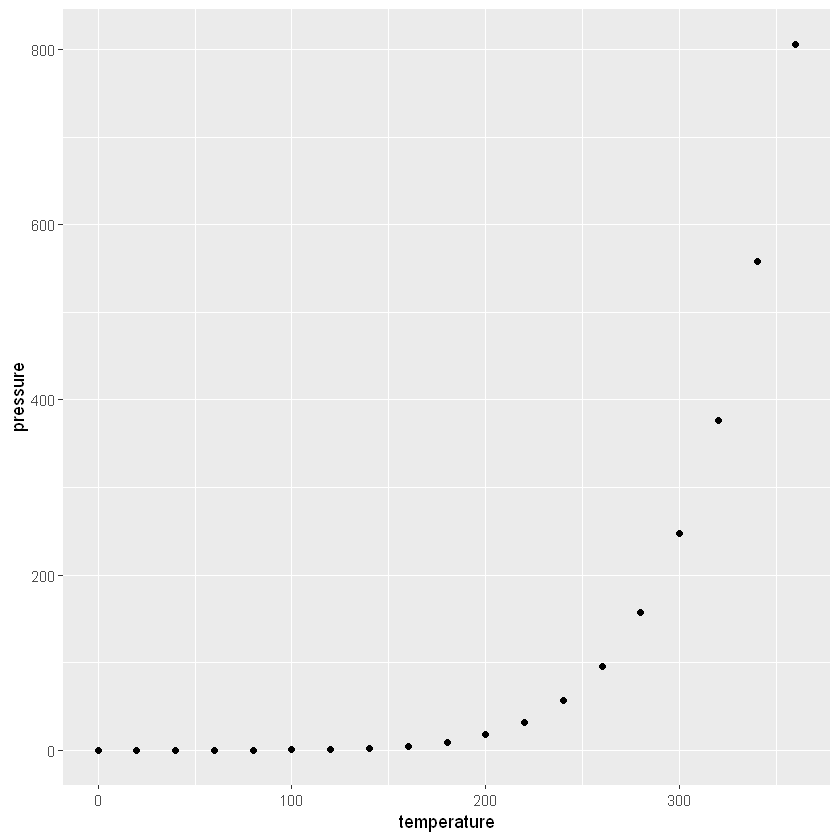

In [7]:
ggplot(data=pressure,aes(x=temperature,y=pressure))+geom_point()

In [8]:
df_cfm_order <- inner_join(reservation_r,order_info_r,by="RESERV_NO") %>% 
select(CUSTOMER_ID,RESERV_NO,VISITOR_CNT,CANCEL,ORDER_NO,ITEM_ID,SALES) %>% 
arrange(CUSTOMER_ID,RESERV_NO,ITEM_ID)

head(df_cfm_order)

CUSTOMER_ID,RESERV_NO,VISITOR_CNT,CANCEL,ORDER_NO,ITEM_ID,SALES
W1327595,2019061801,2,N,190618107186310010,M0001,48000
W1327595,2019071801,4,N,190718107186310010,M0005,140000
W1327803,2019060301,4,N,190603578341100100,M0005,140000
W1327803,2019091506,2,N,190915137187310010,M0005,70000
W1328432,2019060601,4,N,190606607189610010,M0005,140000
W1328432,2019060601,4,N,190606607189610010,M0010,12000


In [11]:
df_sct_graph <- df_cfm_order %>% 
group_by(CUSTOMER_ID) %>% 
summarise(vst_cnt=sum(VISITOR_CNT),cust_amt=sum(SALES/1000))
head(df_sct_graph)

CUSTOMER_ID,vst_cnt,cust_amt
W1327595,6,188
W1327803,6,210
W1328432,20,246
W1328505,20,287
W1328786,1,10
W1328985,8,178


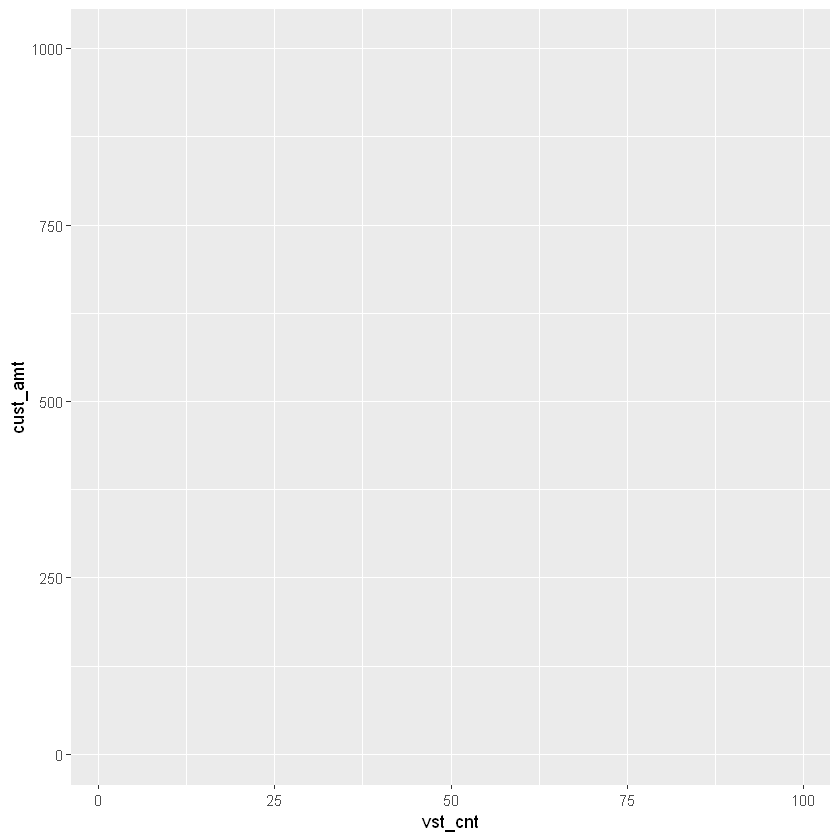

In [12]:
ggplot(data=df_sct_graph,aes(x=vst_cnt,y=cust_amt)) #그래프를 그린다.

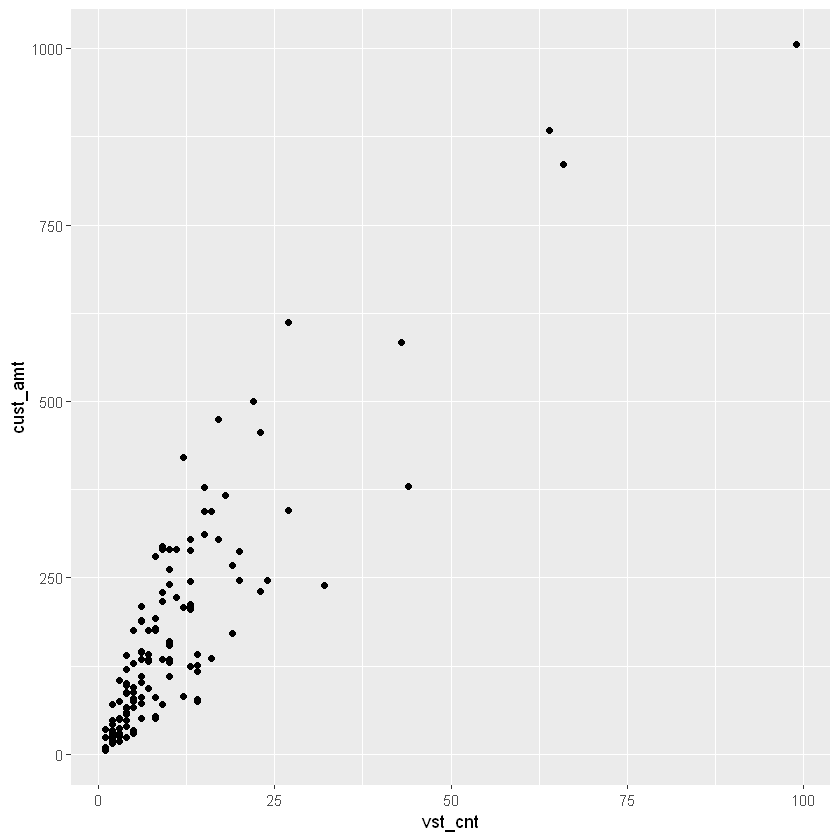

In [13]:
ggplot(data=df_sct_graph,aes(x=vst_cnt,y=cust_amt))+geom_point()

Warning message:
"Removed 5 rows containing missing values (geom_point)."

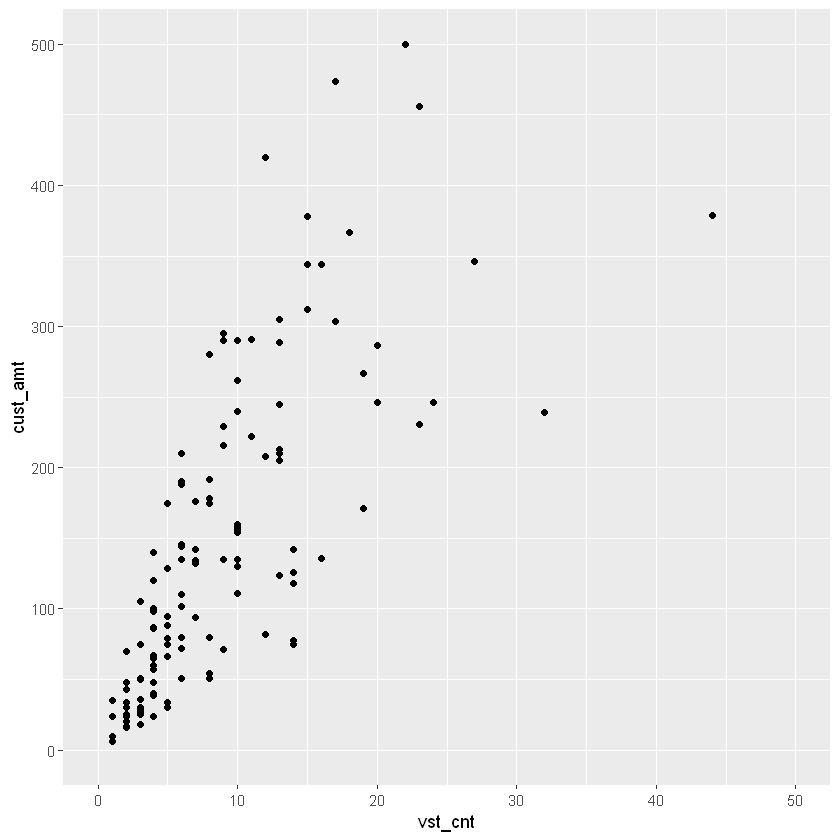

In [14]:
ggplot(data=df_sct_graph,aes(x=vst_cnt,y=cust_amt))+geom_point()+
xlim(0,50)+ylim(0,500)

In [17]:
head(customer_r)

CUSTOMER_ID,CUSTOMER_NAME,PHONE_NUMBER,EMAIL,FIRST_REG_DATE,SEX_CODE,BIRTH,JOB,ZIP_CODE
W1346506,고객71,010-1111-1181,scust71@sfnb.co.kr,19/09/01,F,19820922,자영업,122100
W1347648,고객72,010-1111-1182,scust72@sfnb.co.kr,19/09/04,M,19940812,학생,140100
W1347756,고객73,010-1111-1183,scust73@sfnb.co.kr,19/09/05,M,19931217,NA,152100
W1347984,고객74,010-1111-1184,scust74@sfnb.co.kr,19/09/06,M,19810822,자영업,130100
W1348303,고객75,010-1111-1185,scust75@sfnb.co.kr,19/09/07,M,19900611,NA,121100
W1348424,고객76,010-1111-1186,scust76@sfnb.co.kr,19/09/08,M,19730422,NA,139100


In [19]:
df_sct_graph2 <- inner_join(df_sct_graph,customer_r,by="CUSTOMER_ID") %>% 
select(vst_cnt,cust_amt,SEX_CODE)

head(df_sct_graph2)

vst_cnt,cust_amt,SEX_CODE
6,188,M
6,210,M
20,246,M
20,287,F
1,10,M
8,178,M


Warning message:
"Removed 5 rows containing missing values (geom_point)."

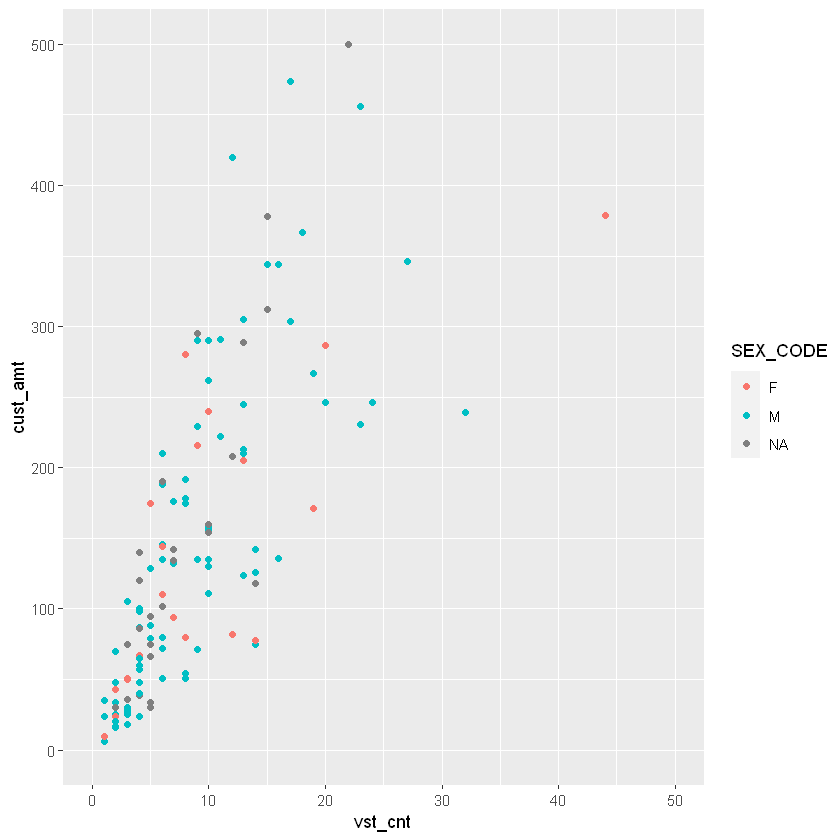

In [20]:
ggplot(data=df_sct_graph2,aes(x=vst_cnt,y=cust_amt,color=SEX_CODE))+
geom_point()+
xlim(0,50)+ylim(0,500)

In [24]:
df_branch_sales_1 <- inner_join(reservation_r,order_info_r,by="RESERV_NO") %>%
select(BRANCH,SALES) %>% arrange(BRANCH,SALES)

df_branch_sales_2 <- df_branch_sales_1 %>% group_by(BRANCH) %>% 
summarise(amt=sum(SALES)/1000) %>% 
arrange(desc(amt))

df_branch_sales_2

BRANCH,amt
강남,4074
영등포,1516
종로,1428
용산,1366
서초,1295
송파,1190
서대문,1180
동작,1149
관악,1101
노원,1054


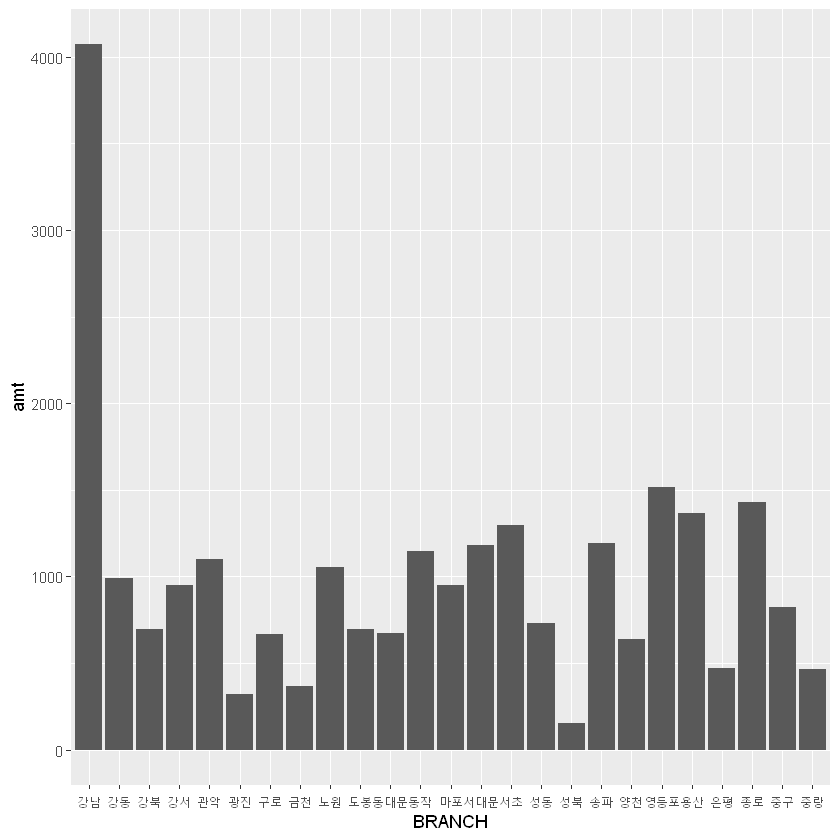

In [25]:
ggplot(df_branch_sales_2,aes(x=BRANCH,y=amt))+geom_bar(stat="identity")

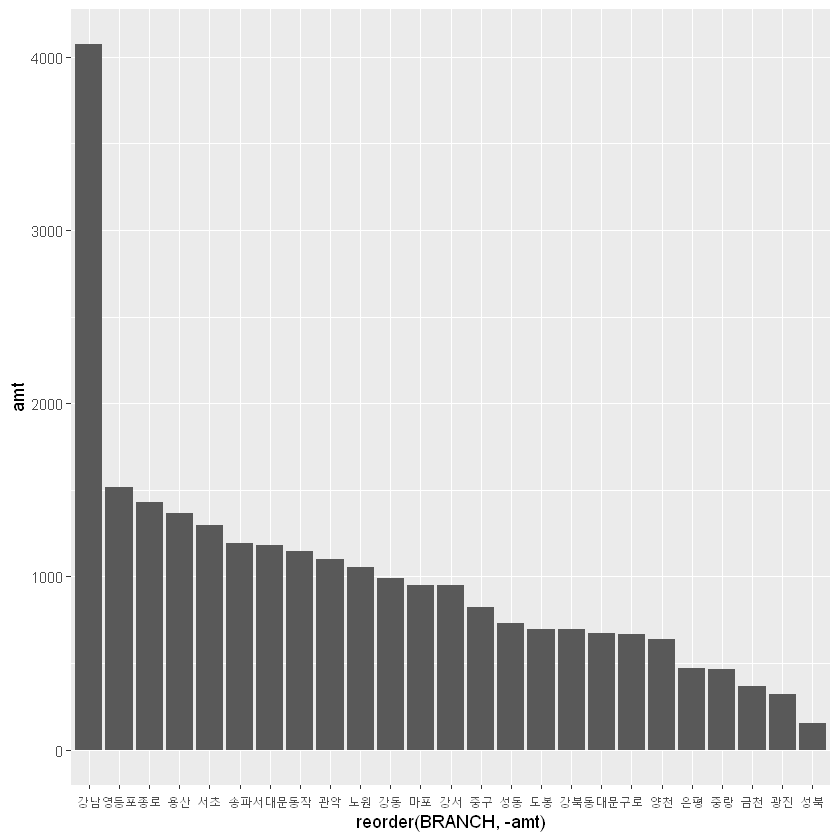

In [27]:
ggplot(df_branch_sales_2,aes(x=reorder(BRANCH,-amt),y=amt))+
geom_bar(stat="identity")

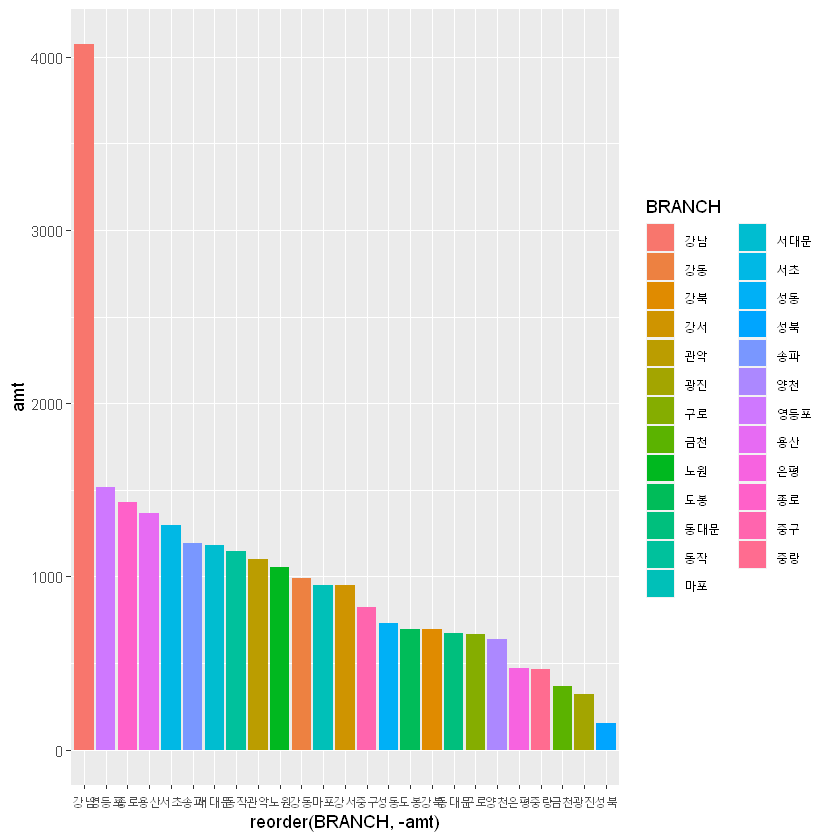

In [28]:
ggplot(df_branch_sales_2,aes(x=reorder(BRANCH,-amt),y=amt,fill=BRANCH))+
geom_bar(stat="identity")

Warning message:
"Removed 20 rows containing missing values (position_stack)."

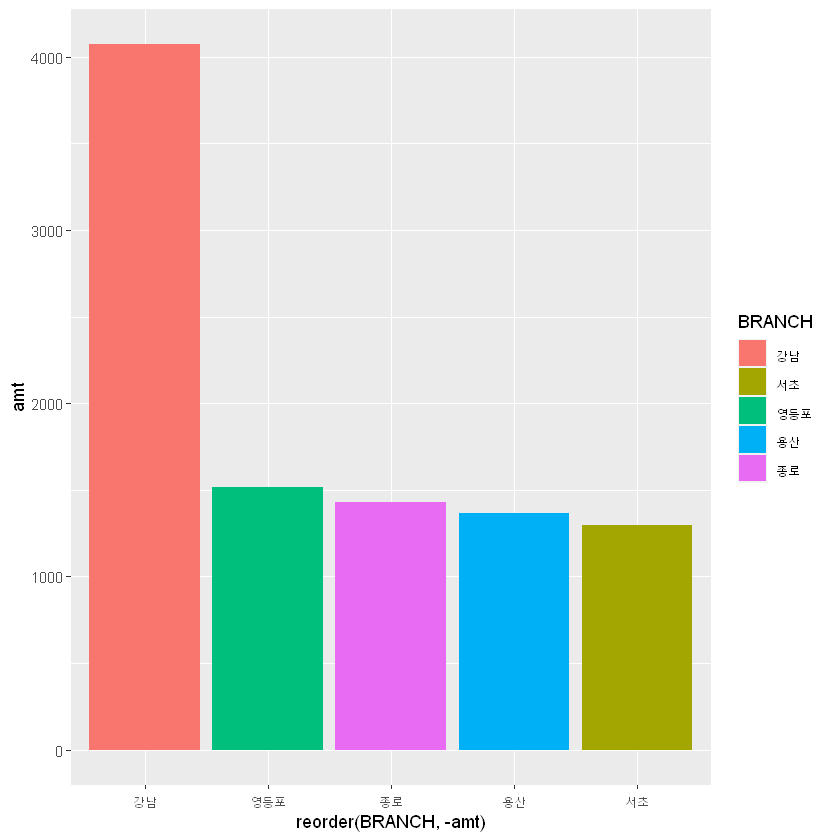

In [31]:
gg <- ggplot(df_branch_sales_2,aes(x=reorder(BRANCH,-amt),y=amt,fill=BRANCH))+
geom_bar(stat="identity")+xlim(c("강남","영등포","종로","용산","서초"))
gg

Warning message:
"Removed 20 rows containing missing values (position_stack)."

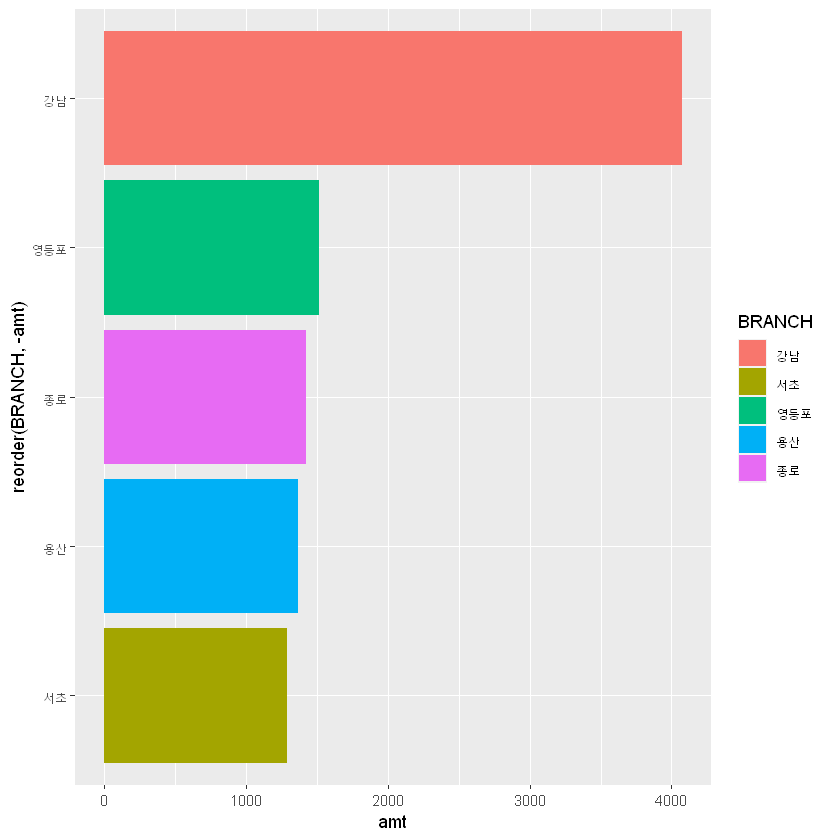

In [32]:
gg <- ggplot(df_branch_sales_2,aes(x=reorder(BRANCH,-amt),y=amt,fill=BRANCH))+
geom_bar(stat="identity")+xlim(c("서초","용산","종로","영등포","강남"))
gg <- gg+coord_flip()
gg

Warning message:
"Removed 20 rows containing missing values (position_stack)."

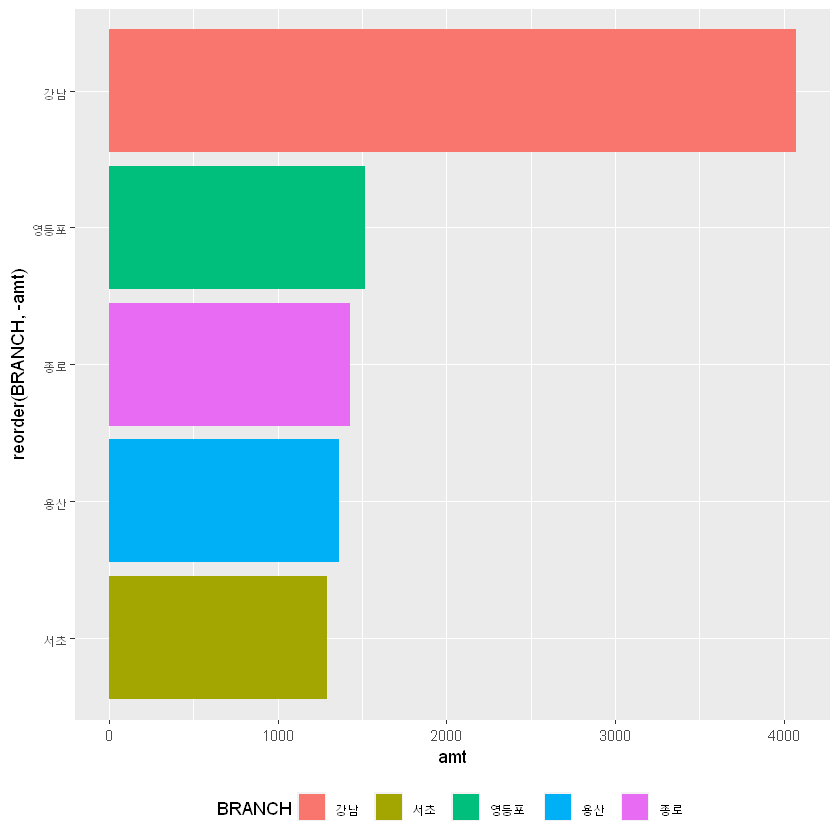

In [33]:
gg <- gg+theme(legend.position="bottom")
gg

Warning message:
"Removed 20 rows containing missing values (position_stack)."

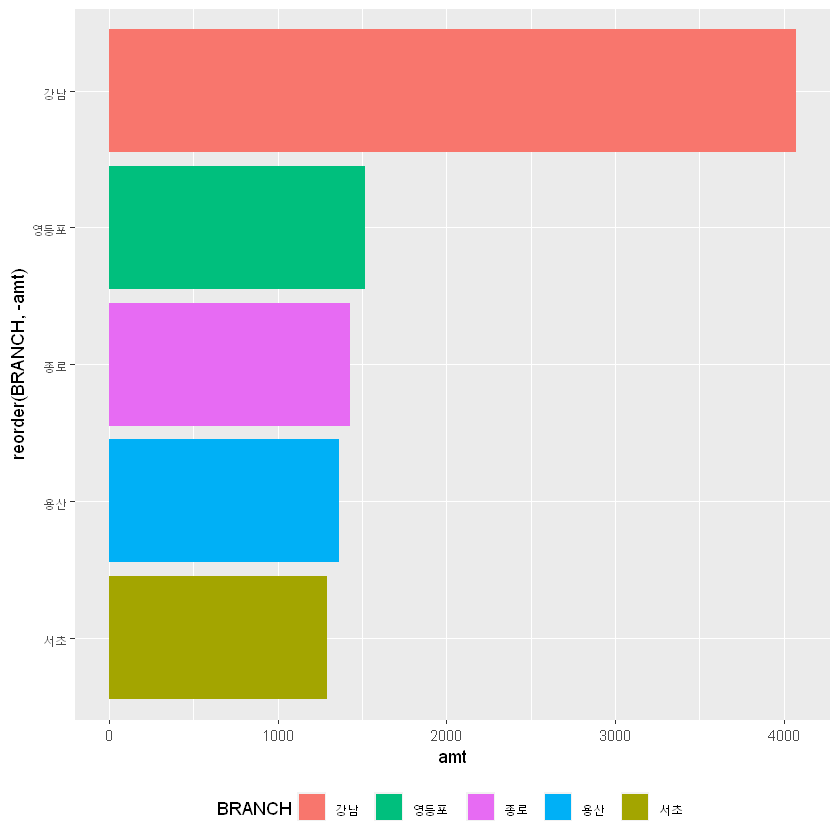

In [34]:
gg <- gg+scale_fill_discrete(breaks=c("강남","영등포","종로","용산","서초"))
gg

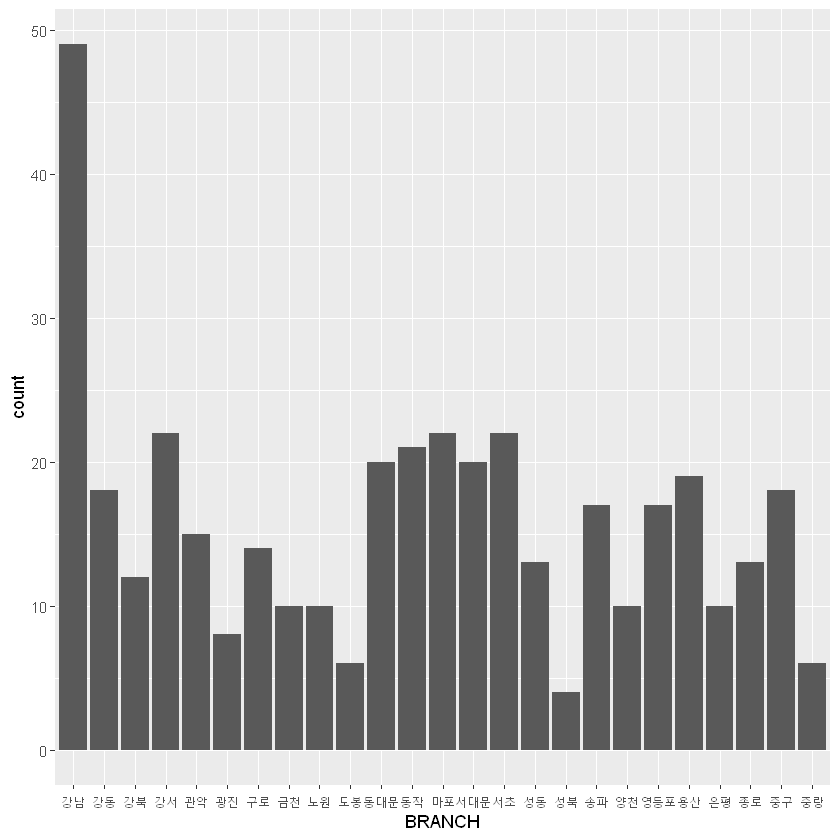

In [36]:
gg <- ggplot(data=reservation_r,aes(x=BRANCH))+
geom_bar(stat="count")
gg

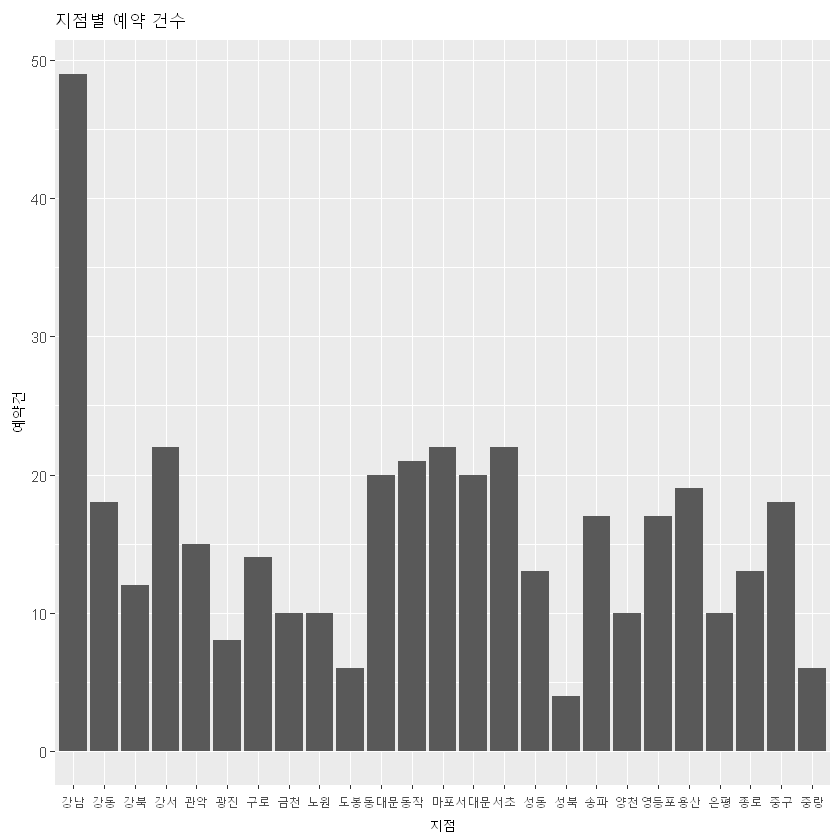

In [37]:
gg <- gg+labs(title="지점별 예약 건수",x="지점",y="예약건")
gg

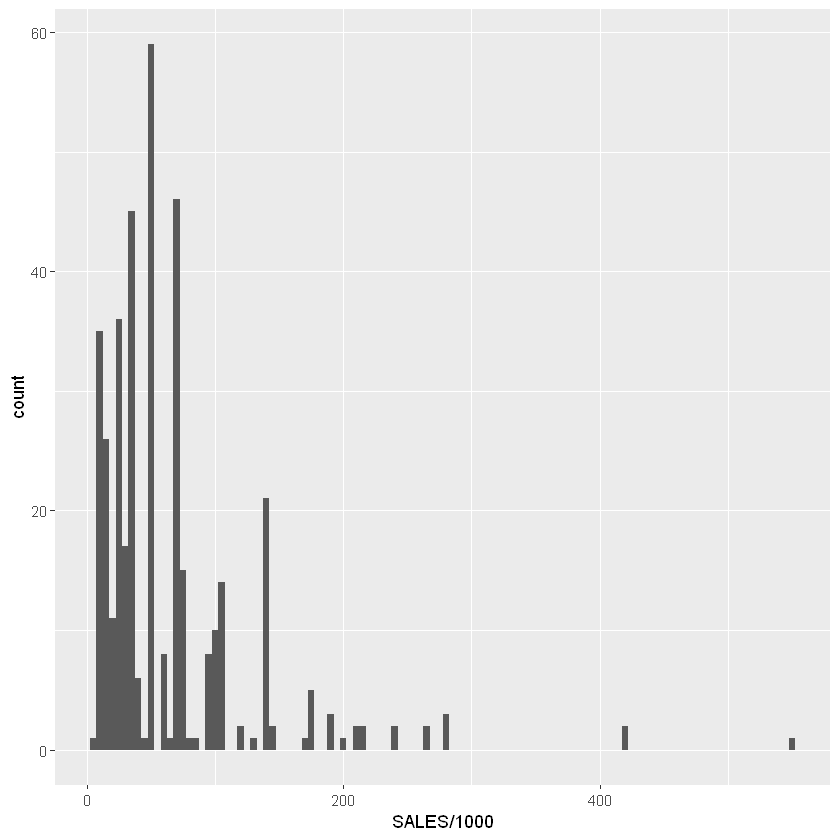

In [38]:
ggplot(data=order_info_r,aes(x=SALES/1000))+geom_histogram(binwidth=5)

In [40]:
df_pie_graph <- inner_join(order_info_r,item_r,by="ITEM_ID") %>% 
group_by(ITEM_ID,PRODUCT_NAME) %>% 
summarise(amt_item=sum(SALES/1000)) %>% 
select(ITEM_ID,amt_item,PRODUCT_NAME)

df_pie_graph

`summarise()` has grouped output by 'ITEM_ID'. You can override using the `.groups` argument.


ITEM_ID,amt_item,PRODUCT_NAME
M0001,5808,SPECIAL_SET
M0002,1968,PASTA
M0003,1666,PIZZA
M0004,1625,SEA_FOOD
M0005,9380,STEAK
M0006,2075,SALAD_BAR
M0007,525,SALAD
M0008,610,SANDWICH
M0009,856,WINE
M0010,444,JUICE


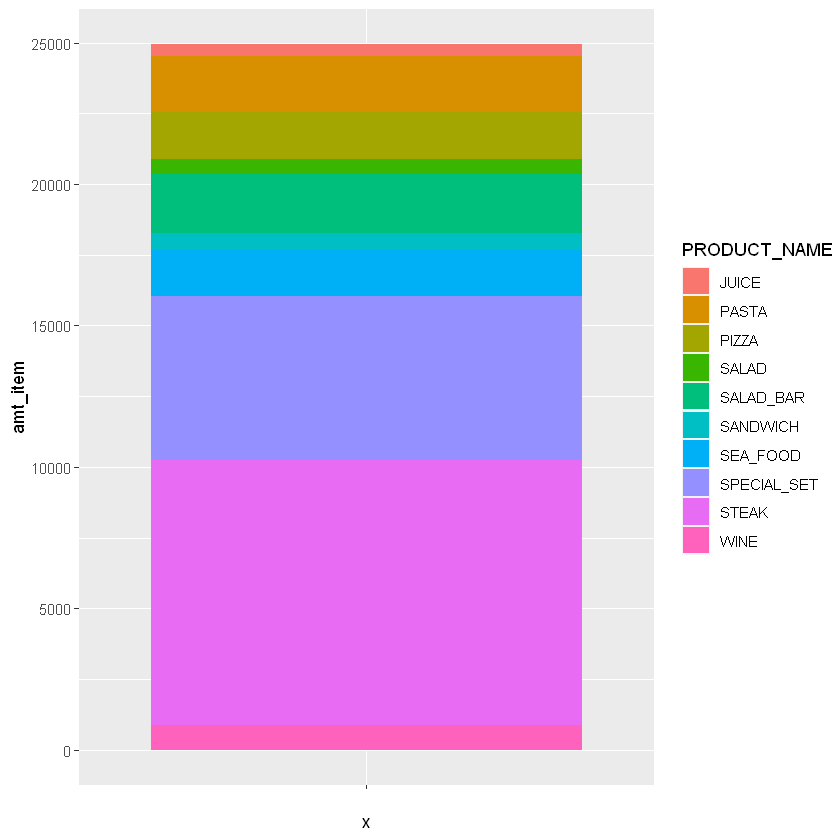

In [42]:
ggplot(df_pie_graph,aes(x="",y=amt_item,fill=PRODUCT_NAME))+
geom_bar(stat='identity')

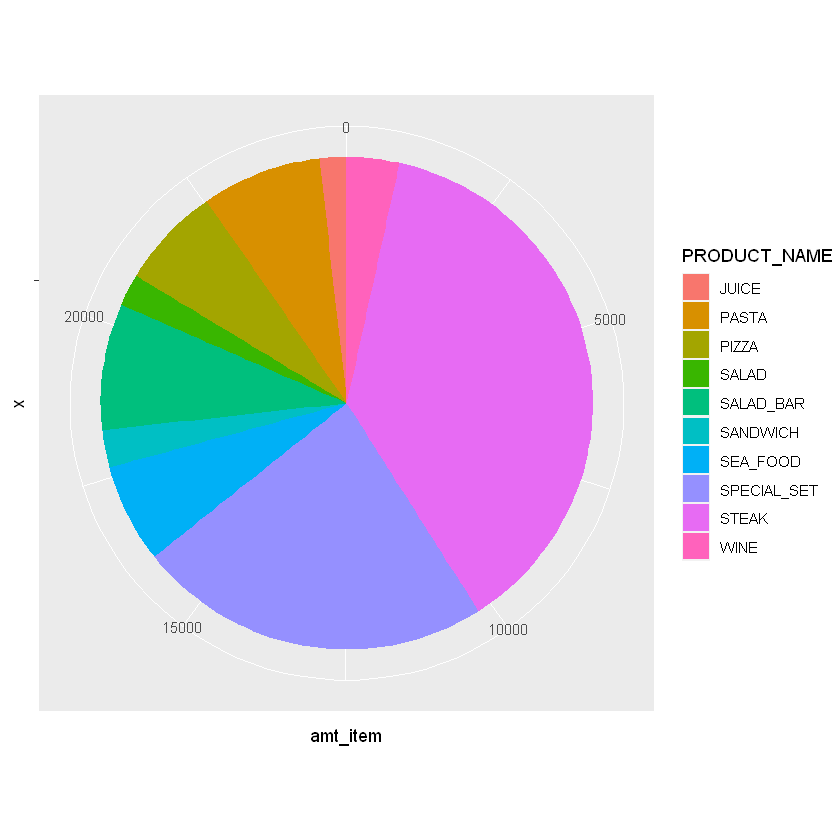

In [44]:
gg <- ggplot(df_pie_graph,aes(x="",y=amt_item,fill=PRODUCT_NAME))+
geom_bar(stat="identity")+
coord_polar("y",start=0)
gg

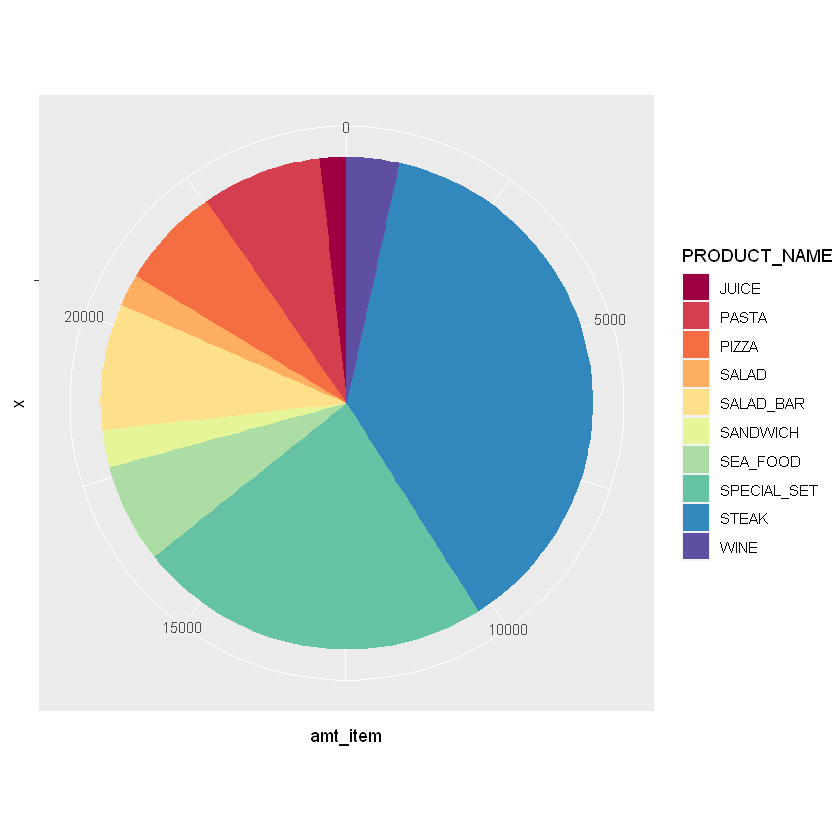

In [45]:
gg <- gg+scale_fill_brewer(palette="Spectral")
gg

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Warning message in RColorBrewer::brewer.pal(n, pal):
"n too large, allowed maximum for palette Oranges is 9
Returning the palette you asked for with that many colors
"

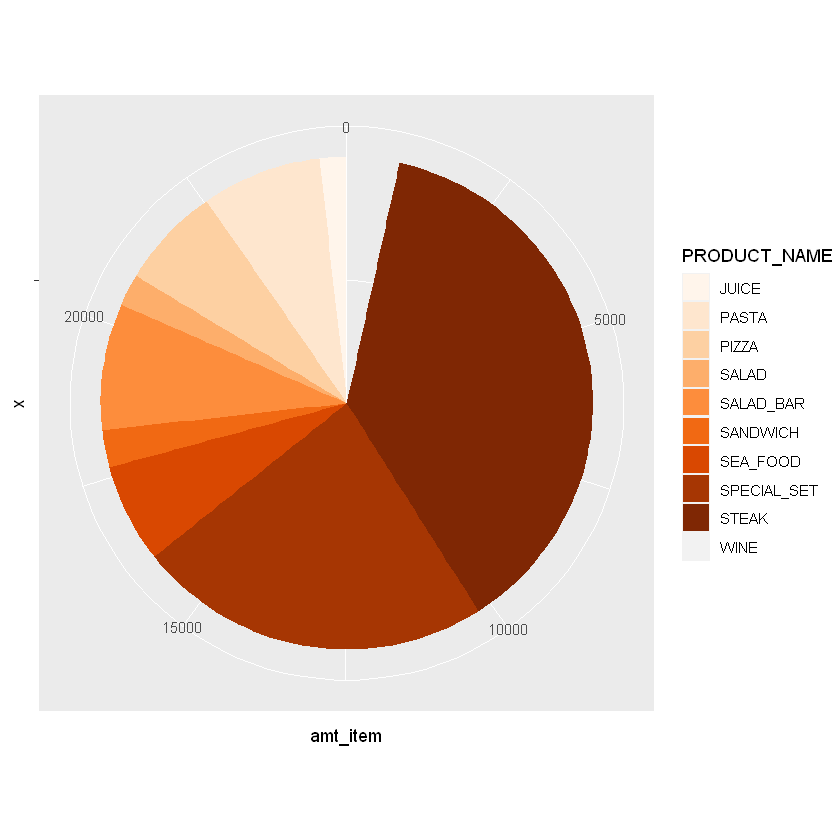

In [49]:
gg <- gg+scale_fill_brewer(palette="Oranges")
gg